<a href="https://colab.research.google.com/github/you9222/Digital_Finance/blob/main/2021_INNO_SCHOOL_PROJECT_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files 


uploaded = files.upload()

Saving aa.csv to aa.csv


In [4]:
df = pd.read_csv('aa.csv', encoding='cp949')

df.head(3)

,표찰번호,새주소,법정동,지번,등주형태,등기구1,등기구2,램프종류1,램프종류2,램프용량1,램프용량2,X좌표,Y좌표
0,01-001,장승배기로128,노량진동,231-4,한전주,컷오프형,컷오프형,LED일체형,LED일체형,25W,25W,126.940565,37.508638
1,01-002,장승배기로128,노량진동,231-4,한전주,컷오프형,NaN,LED일체형,NaN,50W,NaN,126.940675,37.508724
2,01-003,장승배기로20길 15,노량진동,230-39,벽부주,확산형,NaN,메탈등,NaN,70W,NaN,126.940884,37.508879


In [28]:
import folium # pip install folium 
!pip install pyproj
!pip install geopandas
from pyproj import Transformer
import pyproj
import numpy as np
import pandas  as pd
from shapely.geometry import Point as point
import geopandas as gpd

In [29]:
lamp_id = df['표찰번호']
lamp_x = df['X좌표']
lamp_y = df['Y좌표']

In [ ]:
lamp_location = df[['표찰번호','Y좌표', 'X좌표']]

map = folium.Map(location = [37.496381034748936, 126.95742628135055], zoom_start =20)


for a in lamp_location.index:
    latitude = lamp_location.loc[a,"Y좌표"]
    longtitude = lamp_location.loc[a,"X좌표"]
    tooltip = "사고!"
    folium.Marker([latitude, longtitude], popup = '<i>위험</i>', tooltip =tooltip).add_to(map)   
map

In [ ]:
from folium.plugins import MarkerCluster

map = folium.Map(location =  [37.496381034748936, 126.95742628135055], zoom_start =18)

list1=[]
list2=[]

# folium.Marker?

marker_cluster = MarkerCluster().add_to(map)
for a in lamp_location.index:
    folium.Marker(location = [lamp_location.loc[a,"Y좌표"],lamp_location.loc[a,"X좌표"]],
                  popup=lamp_location.loc[a,"표찰번호"]).add_to(marker_cluster)
    list1.append(lamp_location.loc[a,"Y좌표"])
    list2.append(lamp_location.loc[a,"X좌표"])

map

In [ ]:
# Case 1

'''
- x, y 좌표와 대여소ID를 받아서 dict 형태로 만들고 
- x, y 좌표를 QGIS 지도 좌표계에 맞게 변환 (to EPSG:3857)
- 후에 point들을 .shp로 내보내기 
'''

TRAN_4326_TO_3857 = Transformer.from_crs("EPSG:4326", "EPSG:3857") # EPSG:3857좌표계로 변환
	# "ESPG:3857"을 다른 좌표계로 바꾸면 무한하게 응용 가능
points = []
ttareung = []

for i in range(len(df)-1): # 마지막 인덱스에 NaN이 존재해서 -1
    
    idx = lamp_id[i]
    x_coord = lamp_x[i]
    y_coord = lamp_y[i]
    
    xx, yy = TRAN_4326_TO_3857.transform(x_coord, y_coord) # 변환하는 과정
    lamp_dict = {'ID': idx, 'x_coord': xx, 'y_coord': yy}
    
    if i % 20 == 0: 
        print(f'{i}th station is working...')
    
    points.append(point(xx, yy))
    ttareung.append(lamp_dict)

points = gpd.GeoDataFrame(geometry = points)
points.to_file('C:\\Users\\USER\\Desktop\\tta_points.shp', driver="Shapefile")

In [63]:
# Case 2
'''
- x, y 좌표를 받아서 좌표계 변환 없이 m.html에 시각화하기 
'''
#지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기
lat = df['X좌표'].mean()
long = df['Y좌표'].mean()

#지도 띄우기
m = folium.Map([lat, long], zoom_start = 9)

coords = []
for i in range(len(df)-1):
    x = lamp_x[i]
    y = lamp_y[i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Circle(
        location = coords[i],
        radius = 50,
        color = '#000000',
        fill = 'crimson',
    ).add_to(m)

# 코랩에서는 \ 하나 씩 더 붙이기
# https://m.blog.naver.com/PostView.nhn?blogId=kimcd1107&logNo=221589369266&categoryNo=17&proxyReferer=https:%2F%2Fwww.google.com%2F

m.save('C:\\Users\\USER\\Desktop\\a\\map.html')
#m.save("C:\\Users\\USER\\Desktop\\map.html")

#m.save("C:/Users/map.html")
#m.save('C:/Users/user/Desktop/map.html')
#m.save('C:\Users\USER\Desktop\map.html')
#m.save('C:/map.html')

In [68]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [69]:
%pwd

'/content'

In [70]:
%cd/gdrive/

/gdrive


In [71]:
cd "My Drive"

/gdrive/My Drive


In [72]:
%pwd

'/gdrive/My Drive'

In [75]:
%cd /PyData/

[Errno 2] No such file or directory: '/PyData/'
/gdrive/My Drive


In [79]:
%cd /C:\/

[Errno 2] No such file or directory: '/C:/'
/gdrive/My Drive


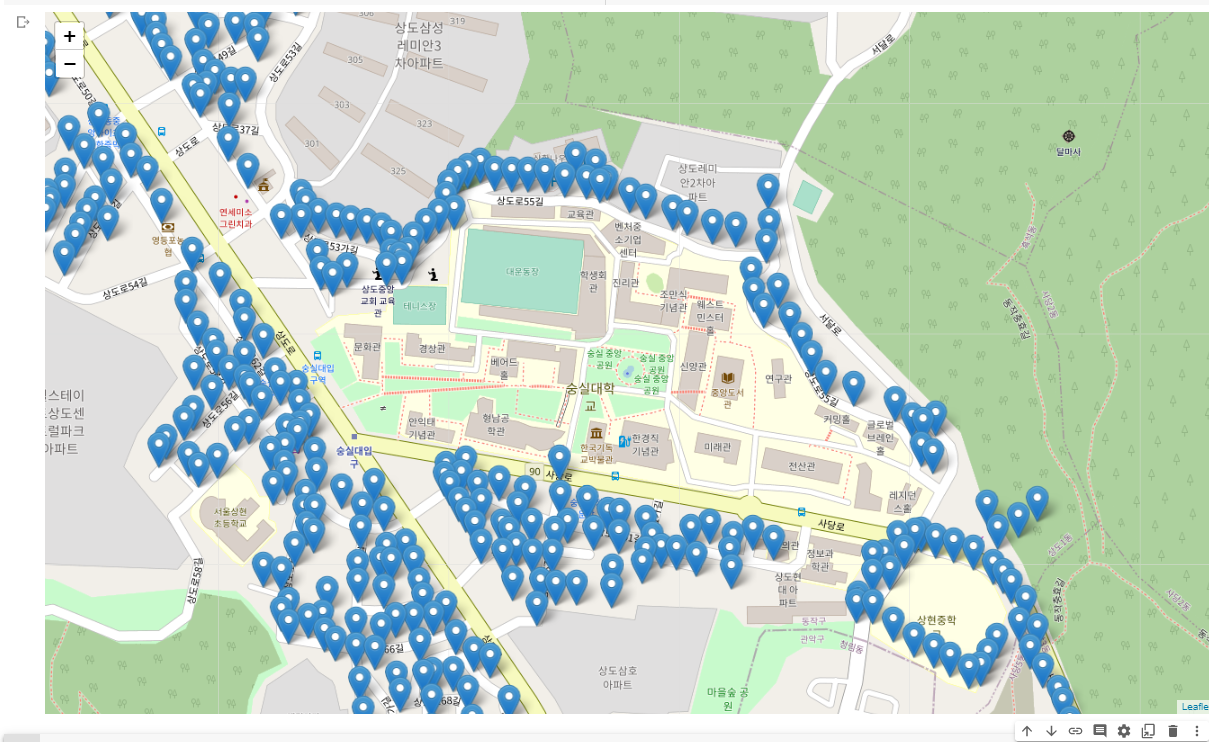

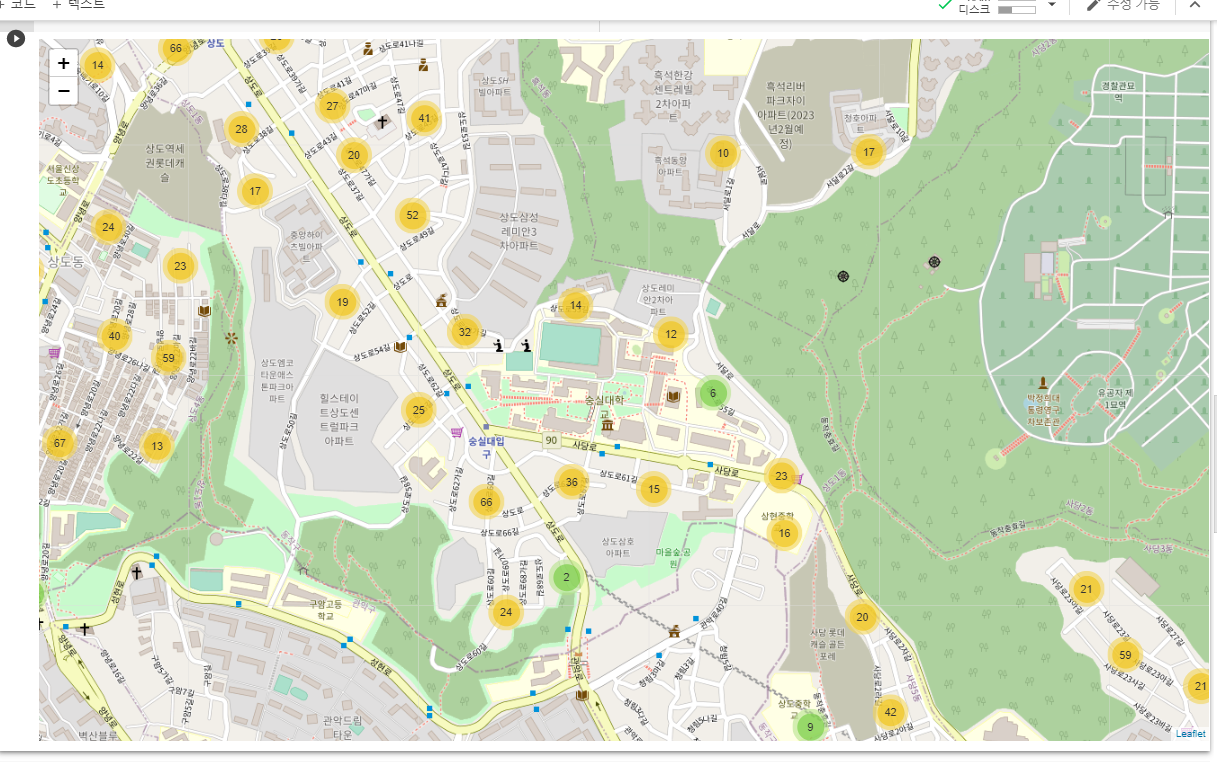

# **사망교통사고 지점**

In [95]:
import pandas as pd
from google.colab import files 


uploaded = files.upload()

df = pd.read_csv('12_19.csv', encoding='cp949')


Saving 12_19.csv to 12_19 (1).csv


In [82]:
df.head(3)

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2012,2012010101,야간,일,1,1,0,0,0,서울,은평구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,949860,1957179,126.931890,37.612680
1,2012,2012010101,야간,일,1,6,5,0,0,전북,정읍시,차대차,정면충돌,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,946537,1737695,126.909523,35.633956
2,2012,2012010108,주간,일,1,1,0,0,0,충남,청양군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,940016,1832833,126.830281,36.491268


In [83]:
import pandas as pd
import folium

In [85]:
djk = df[df['발생지시군구'].str.contains('동작')]
djk_location = djk[['발생지시군구', '위도', '경도']]

map = folium.Map(location = [37.496381034748936, 126.95742628135055], zoom_start =11)


for a in djk_location.index:
    latitude = djk_location.loc[a,"위도"]
    longtitude = djk_location.loc[a,"경도"]
    tooltip = "사고!"
    folium.Marker([latitude, longtitude], popup = '<i>위험</i>', tooltip =tooltip).add_to(map)   

map

# **교통사고다발지점**

In [97]:
import pandas as pd
from google.colab import files 


uploaded = files.upload()

df = pd.read_csv('123.csv', encoding='UTF8')


Saving 123.csv to 123 (1).csv


In [101]:
df.tail(30)

,ESNTL_ID,MANAGE_NO,ACDNT_YEAR,ACDNT_TY,ZONE_CD,SIGNGU_CD_NM,ACDNT_CO,CASLT_CO,DEATH_CO,SWPSN_CO,SINJPSN_CO,INJPSN_CO,LA,LO,SIGNGU_ACCTO_POPLTN_CO,RATE_VALUE
985,NaN,2020037,2019,자전거,전라남도 목포시 산정동(대성동사거리 부근),NaN,4,4,0,1,3,0,34.800719,224973.0,NaN,0.53340
986,NaN,2020037,2019,자전거,전라남도 여수시 충무동(교동사거리 부근),NaN,5,5,0,1,3,1,34.739350,280549.0,NaN,0.53467
987,NaN,2020037,2019,자전거,전라남도 순천시 조곡동(팔마로99 부근),NaN,5,5,0,3,2,0,34.945954,282618.0,NaN,0.53075
988,NaN,2020037,2019,자전거,전라남도 순천시 매곡동(환선로701 부근),NaN,4,4,0,2,2,0,34.961675,282618.0,NaN,0.42460
989,NaN,2020037,2019,자전거,경상북도 포항시 남구 연일읍(제일가정의과의원앞교차로 부근),NaN,6,6,0,1,4,1,35.994922,230573.0,NaN,0.78066
990,NaN,2020037,2019,자전거,경상북도 포항시 남구 대도동(기업은행포항남지점 부근),NaN,5,5,1,3,1,0,36.016228,230573.0,NaN,0.65055
991,NaN,2020037,2019,자전거,경상북도 포항시 남구 오천읍(정몽주로543 부근),NaN,4,4,0,1,3,0,35.966644,230573.0,NaN,0.52044
992,NaN,2020037,2019,자전거,경상북도 포항시 북구 죽도동(양학천로136 부근),NaN,6,6,0,3,3,0,36.026301,272566.0,NaN,0.66039
993,NaN,2020037,2019,자전거,경상북도 포항시 북구 죽도동(오거리 부근),NaN,6,6,0,2,4,0,36.032824,272566.0,NaN,0.66039
994,NaN,2020037,2019,자전거,경상북도 포항시 북구 죽도동(5호광장 부근),NaN,4,4,0,3,1,0,36.020749,272566.0,NaN,0.44026


In [102]:
dj = df[df['ZONE_CD'].str.contains('서울')]
dj_location = dj[['ZONE_CD', 'LA', 'LO']]

map = folium.Map(location = [37.496381034748936, 126.95742628135055], zoom_start =11)


for a in dj_location.index:
    latitude = dj_location.loc[a,"LA"]
    longtitude = dj_location.loc[a,"LO"]
    tooltip = "사고!"
    folium.Marker([latitude, longtitude], popup = '<i>위험</i>', tooltip =tooltip).add_to(map)   

map